### INTRODUCTION

Title: **Bellabeat Case Study**

Author: **Paulo M. Escalante**

Date:

*This is my Python version of the capstone project for the Google Data Analytics course. Kindly reach out to pauloescalante03@gmail.com if you got any feedback.*

##### Company Background

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

Urška Sršen and Sando Mur founded Bellabeat. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

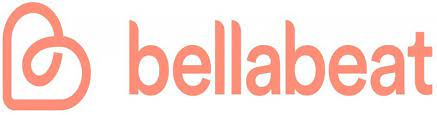

### ASK

##### Business Task

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has
asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain
insight into **how people are already using their smart devices**. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.

##### Key Stakeholders

- **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
- **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

##### Guiding Questions

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### PREPARE

##### Dataset Overview

The data used in this case study is the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit?datasetId=1041311&sortBy=voteCount) (CC0: Public Domain, dataset made available through Mobius). This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. It contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

There are 18 available CSV files from the source. The dataset contains information on common fitness metrics such as calories, sleep, steps, activity, intensity, heartrate, and weight. Data on these metrics were collected on a daily, hourly, and per minute basis, but this study will only focus on daily and hourly metrics, except on minuteMETs file as we don't have a daily or hourly version of this, as it might not be necessary anymore to analyze on a per minute basis. 

The metadata can be found [here](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf).

##### Data Limitations

- Data was collected 5 years ago.
- Only has 33 respondents.
- Data collection was conducted for only two months.
- Lack of demographic information.

### PROCESS

In [1]:
# Importing python modules for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Loading CSVs into dataframes

dailyActivity = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourlyCalories = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
heartrate = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
minuteMETS = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
sleepDay_merged = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo = pd.read_csv(r"/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [4]:
# creating a function for checking the shape and null values of each dataframe

dataframes = {
    'Daily Activity' : dailyActivity,
    'Daily Calories' : dailyCalories,
    'Daily Intensities' : dailyIntensities,
    'Daily Steps' : dailySteps,
    'Hourly Calories' : hourlyCalories,
    'Hourly Intensities' : hourlyIntensities,
    'Hourly Steps' : hourlySteps,
    'Heart Rate' : heartrate,
    'METs Per Minute' : minuteMETS,
    'Sleep Day' : sleepDay_merged,
    'Weight Log Info' : weightLogInfo
}


for key, df in dataframes.items():
    print(key)
    df.info()
    print(' ')

Daily Activity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  


- All daily tables (Daily Activity, Daily Steps, Daily Intensities, and Daily Calories) have 940 rows, indicating that steps, intensities, calories data are already in the Daily Activity table.
- Hourly Calories, Hourly Steps, and Hourly Intensities have 22,099 rows each, suggesting we could merge them into one dataframe provided that no null values will be found.
- No missing values across all columns except the 'Fat' column of weightLogInfo dataframe, which only has 2 rows with values. This column will be removed. 
- Duplicates must be checked on all dataframes too.
- Datetime columns of each dataframe are on object data type, which should be converted to datetime.

In [5]:
# Removing column with null values in the weightLogInfo dataframe

weightLogInfo = weightLogInfo.drop(columns='Fat')
weightLogInfo.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000


In [6]:
# Checking for duplicates

def duplicates(df):
    return df.duplicated().sum()

for key, df in dataframes.items():
    print(f'No. of duplicates in {key} : {df.duplicated().sum()}')

No. of duplicates in Daily Activity : 0
No. of duplicates in Daily Calories : 0
No. of duplicates in Daily Intensities : 0
No. of duplicates in Daily Steps : 0
No. of duplicates in Hourly Calories : 0
No. of duplicates in Hourly Intensities : 0
No. of duplicates in Hourly Steps : 0
No. of duplicates in Heart Rate : 0
No. of duplicates in METs Per Minute : 0
No. of duplicates in Sleep Day : 3
No. of duplicates in Weight Log Info : 0


- Only Sleep Day dataframe has duplicate rows, which will be removed.

In [7]:
# Dropping duplicates on sleepDay

sleepDay = sleepDay_merged.drop_duplicates()
sleepDay.shape # From 413 to 410 rows.

(410, 5)

Changing data type of datetime columns from object to datetime

- We will first rename all datetime columns to 'Date'. This is to ensure that the datetime columns will not be duplicated when merging dataframes.

In [8]:
# Renaming all datetime columns to 'Date'

dailyActivity.rename(columns = {'ActivityDate' : 'Date'}, inplace=True)
dailyCalories.rename(columns = {'ActivityDay' : 'Date'}, inplace=True)
dailyIntensities.rename(columns = {'ActivityDay' : 'Date'}, inplace=True)
dailySteps.rename(columns = {'ActivityDay' : 'Date'}, inplace=True)
hourlyCalories.rename(columns = {'ActivityHour' : 'Date'}, inplace=True)
hourlyIntensities.rename(columns = {'ActivityHour' : 'Date'}, inplace=True)
hourlySteps.rename(columns = {'ActivityHour' : 'Date'}, inplace=True)
minuteMETS.rename(columns = {'ActivityMinute' : 'Date'}, inplace=True)
heartrate.rename(columns = {'Time' : 'Date'}, inplace=True)
sleepDay.rename(columns = {'SleepDay' : 'Date'}, inplace=True)

- We will now examine if daily steps, intensities, and calories are already in the dailyActivity dataframe.

In [9]:
# Examining if daily calories, daily steps, and daily intensities are already in daily activity

dailyActivity_merged = dailyActivity.merge(dailyCalories, on=['Id', 'Date'], how='left', suffixes=['_org', '_seq']) \
    .merge(dailySteps, on=['Id', 'Date'], how='left', suffixes=['_org', '_seq']) \
    .merge(dailyIntensities, on=['Id', 'Date'], how='left', suffixes=['_org', '_seq'])

dailyActivity_merged['Calories_Existing'] = dailyActivity_merged['Calories_org'] == dailyActivity_merged['Calories_seq']
print('Calories Existing:', dailyActivity_merged['Calories_Existing'].value_counts())

dailyActivity_merged['Steps_Existing'] = dailyActivity_merged['TotalSteps'] == dailyActivity_merged['StepTotal']
print('Steps_Existing:', dailyActivity_merged['Steps_Existing'].value_counts())

dailyActivity_merged['Intensities_Existing'] = dailyActivity_merged['VeryActiveMinutes_org'] == dailyActivity_merged['VeryActiveMinutes_seq']
print('Intensities Existing:', dailyActivity_merged['Intensities_Existing'].value_counts())

Calories Existing: True    940
Name: Calories_Existing, dtype: int64
Steps_Existing: True    940
Name: Steps_Existing, dtype: int64
Intensities Existing: True    940
Name: Intensities_Existing, dtype: int64


- The data points on the three dataframes are indeed already existing on dailyActivity, thus there is no need for these three dataframes to be used.
- Next step is to merge the hourly dataframes into one dataframe.

In [10]:
# Merging hourly dataframes into one dataframe

hourlyActivity = hourlyCalories.merge(hourlyIntensities, on=['Id', 'Date'], how='left') \
.merge(hourlySteps, on=['Id', 'Date'], how='left')

hourlyActivity.isnull().sum() # no null values found, we will proceed with hourlyActivity dataframe instead

Id                  0
Date                0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64

In [11]:
# Converting all Date columns into datetime data type

def to_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=False)

to_datetime(dailyActivity)
to_datetime(hourlyActivity)
to_datetime(minuteMETS)
to_datetime(heartrate)
to_datetime(weightLogInfo)
to_datetime(sleepDay)

- It is now time to extract month and day name as these will be useful for analysis later on.

In [12]:
# Extracting month and day from date

def date_extract(df):
    df['Day'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month

date_extract(dailyActivity)
date_extract(hourlyActivity)
date_extract(minuteMETS)
date_extract(heartrate)
date_extract(weightLogInfo)
date_extract(sleepDay)

- Since hourlyActivity, minuteMETS, and heartrate have hour data available, this will also be extracted for these dataframes.

In [13]:
# Extracting month and day from date

def hour_extract(df):
    df['Hour'] = df['Date'].dt.hour

hour_extract(heartrate)
hour_extract(hourlyActivity)
hour_extract(minuteMETS)

- We will now check the number of unique IDs on each dataframe.

In [14]:
def unique(df):
    return len(df['Id'].unique())

print('Daily Activity: ', unique(dailyActivity))
print('Hourly Activity: ', unique(hourlyActivity))
print('METs per minute: ', unique(minuteMETS))
print('Heart rate: ', unique(heartrate))
print('Weight Log Info: ', unique(weightLogInfo))
print('Sleep Day: ', unique(sleepDay))

Daily Activity:  33
Hourly Activity:  33
METs per minute:  33
Heart rate:  14
Weight Log Info:  8
Sleep Day:  24


- As it turns out, dailyActivity, hourlyActivity, and minuteMETs all have 33 participants.
- Due to low number of participants on heartrate and weightloginfo, they will be dropped in this case study.

### Checking study duration on each dataframe 

In [15]:
def date_duration(df):
    start_date = df['Date'].min()
    end_date = df['Date'].max()
    return f'Start Date: {start_date}, End Date: {end_date}'

print(f'Daily Activity: {date_duration(dailyActivity)}')
print(f'Hourly Activity: {date_duration(hourlyActivity)}')
print(f'METs per minute: {date_duration(minuteMETS)}')
print(f'Sleep Day: {date_duration(sleepDay)}')

Daily Activity: Start Date: 2016-04-12 00:00:00, End Date: 2016-05-12 00:00:00
Hourly Activity: Start Date: 2016-04-12 00:00:00, End Date: 2016-05-12 15:00:00
METs per minute: Start Date: 2016-04-12 00:00:00, End Date: 2016-05-12 15:59:00
Sleep Day: Start Date: 2016-04-12 00:00:00, End Date: 2016-05-12 00:00:00


- We can confirm on all dataframes that the study started on 12 April 2016 and ended on 12 May 2016, with a duration of 30 days.

To summarize the data cleaning process:

- CSV files were loaded into the dataframes.
- Due to several null values, the 'Fat' column of weightLogInfo was dropped.
- The data type of datetime columns were amended accordingly. 
- Day name and month were extracted from the 'Date' column of the dataframes. Hour was also extracted.
- The number of unique participants were determined.

### ANALYZE


### Analyzing dailyActivity

##### Summary Statistics

In [16]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Month
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,4.350000
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.477224
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,4.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,4.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,5.000000


- The average steps per day is 7,637.
- The average distance per day is 5.5 kilometers.
- The average very active minutes per day is 21 mins.
- The average fairly active minutes per day is 14 mins.
- The average lightly active minutes per day is 193 mins, or 3.2 hours.
- The average sedentary minutes per day is 991 mins, or 16.5 hours.

##### Percentage of Activity Minutes per Category

In [17]:
# Creating a new dataframe daily_lifestyle
id_vars = ['Id', 'Date']
value_vars = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
daily_lifestyle = dailyActivity.melt(id_vars=id_vars, value_vars=value_vars, var_name='Category', value_name='Minutes')

# Grouping dataframe by Category
activity_by_category = daily_lifestyle.groupby('Category')['Minutes'].sum().sort_values(ascending=False).reset_index()

# Calculating total minutes
total_mins = daily_lifestyle['Minutes'].sum()

# Creating percentage column
activity_by_category['Percentage'] = activity_by_category['Minutes'] / total_mins

# Dropping extra column
activity_by_category.drop(columns='Minutes', inplace=True)

activity_by_category

,Category,Percentage
0,SedentaryMinutes,0.813299
1,LightlyActiveMinutes,0.158205
2,VeryActiveMinutes,0.017366
3,FairlyActiveMinutes,0.011130


- Majority of the users' time are spent on sedentary state (81%), and only 3% on fairly active to very active state.

##### Per Day Breakdown

In [18]:
# Extracting date without time from minuteMETs
minuteMETS['Date'] = pd.to_datetime(minuteMETS['Date'].dt.date)

# Grouping minuteMETs by Id and Date for merging with dailyActivity
dailyMETs = minuteMETS.groupby(['Id','Date'])['METs'].mean().reset_index()

# Merging with dailyActivity
dailyActivity = dailyActivity.merge(dailyMETs, on=['Id', 'Date'], how='left')

# Grouping by day name
columns = ['Calories', 
           'TotalSteps', 
           'TotalDistance', 
           'VeryActiveMinutes', 
           'FairlyActiveMinutes',
           'LightlyActiveMinutes',
           'SedentaryMinutes',
           'METs'
          ]

per_day = dailyActivity.groupby('Day')[columns].mean().sort_values(by='Calories', ascending=False)
per_day

,Calories,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,METs
Day,,,,,,,,
Tuesday,2356.013158,8125.006579,5.832237,22.953947,14.335526,197.342105,1007.361842,14.879750
Saturday,2354.967742,8152.975806,5.854677,21.919355,15.201613,207.145161,964.282258,14.985346
Friday,2331.785714,7448.230159,5.309921,20.055556,12.111111,204.198413,1000.309524,14.698080
Monday,2324.208333,7780.866667,5.552917,23.108333,14.000000,192.058333,1027.941667,14.661566
Wednesday,2302.620000,7559.373333,5.488333,20.780000,13.100000,189.853333,989.480000,14.612189
Sunday,2263.000000,6933.231405,5.027190,19.983471,14.528926,173.975207,990.256198,14.213843
Thursday,2199.571429,7405.836735,5.312245,19.408163,11.959184,185.421769,961.993197,14.569226


- Tuesday is the day the users burn the most calories.

##### Percentage of Users Averaging More Than 30 Minutes of At Least Moderately Active Excercise Per Day

In [19]:
# Subsetting records which fall under failry active and very active minutes
active_minutes = ['FairlyActiveMinutes', 'VeryActiveMinutes']
active_lifestyle = daily_lifestyle[daily_lifestyle['Category'].isin(active_minutes)]

# Grouping by Id
active_persons = active_lifestyle.groupby('Id')['Minutes'].sum().sort_values(ascending=False).reset_index()

# Dividing total minutes by 30 days
active_persons['Daily Average'] = active_persons['Minutes'] / 30

# Adding a column to determine whether the average is more or less than 30 minutes
active_persons['Category'] = np.where(active_persons['Daily Average'] >= 30, 'More than 30', 'Less than 30')

# Breaking down active to not active
active_persons_cat = active_persons['Category'].value_counts()
active_persons_cat

Less than 30    18
More than 30    15
Name: Category, dtype: int64

- 54% (or 18 users) averaged less than 30 mins of moderately active to very active minutes per day, while 45% (or 15 users) averaged more than 30 mins.

##### Correlations

Pearson Correlation was used to find trends and measure how strong a relationship is between two variables. The results returned values between -1 and 1, where:

- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- A result of zero indicates no relationship at all.

In [20]:
# Calculating correlation between calories burned and selected columns
columns = ['TotalSteps', 
           'TotalDistance', 
           'VeryActiveMinutes', 
           'FairlyActiveMinutes',
           'LightlyActiveMinutes',
           'SedentaryMinutes',
           'METs'
          ]

for col in columns:
    subset = dailyActivity[['Calories', col]]
    print(f'Calories vs. {col}')
    print(subset.corr())
    print(' ')

Calories vs. TotalSteps
            Calories  TotalSteps
Calories    1.000000    0.591568
TotalSteps  0.591568    1.000000
 
Calories vs. TotalDistance
               Calories  TotalDistance
Calories       1.000000       0.644962
TotalDistance  0.644962       1.000000
 
Calories vs. VeryActiveMinutes
                   Calories  VeryActiveMinutes
Calories           1.000000           0.615838
VeryActiveMinutes  0.615838           1.000000
 
Calories vs. FairlyActiveMinutes
                     Calories  FairlyActiveMinutes
Calories             1.000000             0.297623
FairlyActiveMinutes  0.297623             1.000000
 
Calories vs. LightlyActiveMinutes
                      Calories  LightlyActiveMinutes
Calories              1.000000              0.286718
LightlyActiveMinutes  0.286718              1.000000
 
Calories vs. SedentaryMinutes
                  Calories  SedentaryMinutes
Calories          1.000000         -0.106973
SedentaryMinutes -0.106973          1.000000
 
Calor

- At 0.59, there is a moderately high positive correlation between calories and steps.
- At 0.64, there is a moderately high positive correlation between calories and distance.
- At 0.62, there is a moderately high positive correlation between calories and very active minutes.
- At 0.30, there is a low positive correlation between calories and fairly active minutes.
- At 0.29, there is a negligible positive correlation between calories and lightly active minutes.
- At -0.11, there is a negligible negative correlation between calories and sedentary minutes.

##### Calculating correlation between calories and METs

### Analyzing hourlyActivity

##### Summary Statistics

In [21]:
hourlyActivity.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal,Month,Hour
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342,4.338748,11.415765
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228,0.473295,6.915140
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000,4.000000,11.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000,5.000000,17.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000,5.000000,23.000000


Insights from hourlyActivity:

- The average calories burned per hour is 97 kcal.
- The average total intensity per hour is 12.
- The average steps per hour is 320.

##### Calories, Intensity, and Steps per Hour

In [22]:
# Grouping by hour of day
columns = ['Calories',
          'TotalIntensity',
          'StepTotal']

hourly_lifestyle = hourlyActivity.groupby('Hour')[columns].mean()
hourly_lifestyle

,Calories,TotalIntensity,StepTotal
Hour,,,
0,71.805139,2.129550,42.188437
1,70.165059,1.419078,23.102894
2,69.186495,1.043944,17.110397
3,67.538049,0.443730,6.426581
4,68.261803,0.633047,12.699571
5,81.708155,4.950644,43.869099
6,86.996778,7.771214,178.508056
7,94.477981,10.733620,306.049409
8,103.337272,14.668099,427.544576


- 18:00 (6:00 PM) is the hour the participants are mostly active, as it recorded the highest number of calories burned, total intensity, and steps.

### Analyzing minuteMETs

##### Summary Statistics

In [23]:
minuteMETS.describe()

,Id,METs,Month,Hour
count,1.325580e+06,1.325580e+06,1.325580e+06,1.325580e+06
mean,4.847898e+09,1.469001e+01,4.338569e+00,1.141511e+01
std,2.422313e+09,1.205541e+01,4.732231e-01,6.915801e+00
min,1.503960e+09,0.000000e+00,4.000000e+00,0.000000e+00
25%,2.320127e+09,1.000000e+01,4.000000e+00,5.000000e+00
50%,4.445115e+09,1.000000e+01,4.000000e+00,1.100000e+01
75%,6.962181e+09,1.100000e+01,5.000000e+00,1.700000e+01
max,8.877689e+09,1.570000e+02,5.000000e+00,2.300000e+01


Insight from minuteMETs:

- The average METs per minute is 14.69.

##### METs per hour

In [24]:
hourlyMETs = minuteMETS.groupby('Hour')['METs'].mean().reset_index()
hourlyMETs

,Hour,METs
0,0,10.845360
1,1,10.560218
2,2,10.404001
3,3,10.169418
4,4,10.248784
5,5,11.872371
6,6,12.944128
7,7,14.292159
8,8,15.563928
9,9,16.169567


- 18:00 (6:00 PM) is also the hour participants recorded the highest total METs in an hour. 17-19 is their most active.

##### Analyzing sleepDay

##### Summary statistics

In [25]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Month
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,4.356098
std,2.060863e+09,0.346636,118.635918,127.455140,0.479430
min,1.503960e+09,1.000000,58.000000,61.000000,4.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,4.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,4.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,5.000000
max,8.792010e+09,3.000000,796.000000,961.000000,5.000000


Insights from sleepDay:
    
- The average total sleep records is 1.1.
- The average total minutes asleep is 419 minutes, or 7 hours.
- The average total time in bed is 458 minutes, or 7.6 hours.

In [26]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   Date                410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
 5   Day                 410 non-null    object        
 6   Month               410 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 25.6+ KB


#### Total Hours Asleep Per Day

In [27]:
# Adding Hours column to convert TotalMibutesAsleep minutes to hrs

sleepDay.loc[:, 'TotalHoursAsleep'] = np.round((sleepDay['TotalMinutesAsleep'] / 60), 2)

daily_sleep = sleepDay.groupby('Day')['TotalHoursAsleep'].mean().sort_values(ascending=False)
daily_sleep

Day
Sunday       7.546545
Wednesday    7.245606
Monday       6.992391
Saturday     6.985088
Friday       6.757368
Tuesday      6.742615
Thursday     6.688438
Name: TotalHoursAsleep, dtype: float64

- On average, users slept the most every Sundays, averaging 7.5 hours of sleep.

##### Percentage of Participants Who Averaged At Least 7 Hours of Sleep

In [28]:
# Grouping sleepDay by Id
hours_asleep_id = sleepDay.groupby('Id')['TotalHoursAsleep'].sum().reset_index()

# Dividing hours by 30 days
hours_asleep_id['AverageHoursAsleep'] = hours_asleep_id['TotalHoursAsleep'] / 30

# Categorizing whether the average is more than or less than 7 hours
hours_asleep_id['Sleep Cat'] = np.where(hours_asleep_id['AverageHoursAsleep'] >= 7, "More than 7 hours", "Less than 7 hours")

hours_asleep_id['Sleep Cat'].value_counts(normalize=True)

Less than 7 hours    0.833333
More than 7 hours    0.166667
Name: Sleep Cat, dtype: float64

- It appears that 83% of the participants did not get prescribed hours of sleep.
- However, this insight is not accurate as several records showed averages of less than an hour of sleep, which means the app is not being frequently used to track sleep data.
- This is also the result of only 24 out of the 33 participants who tracked sleep data.

### SHARE


##### Key insights from the analysis phase:

- The average steps per day of the participants is 7,638. This is below [UC Davis Health's](https://health.ucdavis.edu/internalmedicine/cardio/pdf/WomensHeartHealth/2015/10000-steps-a-day.pdf) prescribed amount of steps at 10,000.
- The participants averaged 5.5-kilometer distance, which is below the prescribed [8 kilometers per day](http://www.thewalkingsite.com/10000steps.html).
- The average sleep time by all users is 418 minutes, or 7 hrs per day. [National Sleep Foundation](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need#:~:text=National%20Sleep%20Foundation%20guidelines1,to%208%20hours%20per%20night) advise that healthy adults need between 7 and 9 hours of sleep per night. The average time in bed is 458 minutes, or 7.63 hrs, which means it takes 40 minutes for the users to fall asleep. According to the Sleep Foundation, regularly taking longer than 30 minutes to fall asleep is an indicator of poor sleep.
- Only 24 participants tracked their sleep data, and very few of those 24 tracked their sleep data thoroughly. Heart rate and weight log data would've been critical in this case study, but was omitted as only a handful of participants tracked these data points.

##### Percentage of Activity Minutes per Category

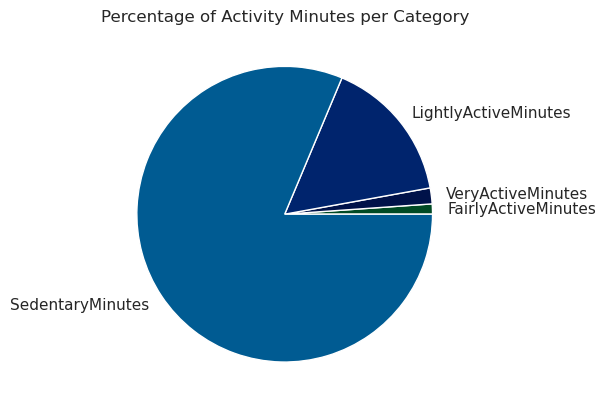

In [29]:
sns.set_style('dark')
sns.set_context('notebook')
sns.set_palette("ocean")

activity_ind = activity_by_category.set_index('Category')

activity_sorted = activity_ind.sort_values(by='Percentage', ascending=True)

plt.pie(activity_sorted['Percentage'], labels = activity_sorted.index)

plt.title('Percentage of Activity Minutes per Category')

plt.show()

- We can see on the graph that majority of participants' time are spent on a sedentary state.

##### Percentage of Users Averaging More Than 30 Minutes of At Least Moderately Active Excercise Per Day

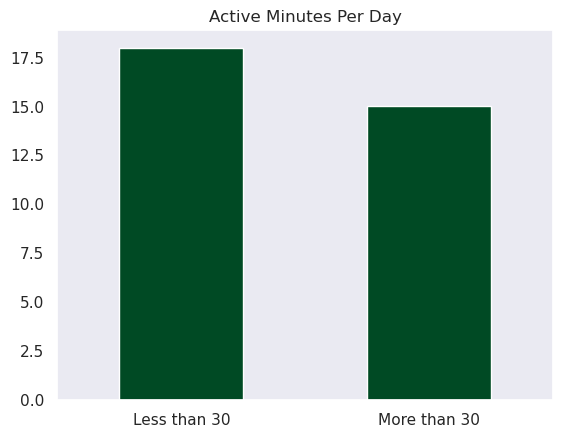

In [30]:
active_persons_cat.plot(kind='bar', rot=0)
plt.title('Active Minutes Per Day')
plt.show()

- Users spend the majority of their time in a sedentary state, which comprises 81%, or 16 hours on average in a day. Users are only active on about 19%, or 4 hrs in a day. As per [Mayo Clinic](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/exercise/faq-20057916#:~:text=As%20a%20general%20goal%2C%20aim,your%20risk%20of%20metabolic%20problems.), a general goal should be to aim for at least 30 minutes of moderate physical activity every day.

##### Correlation of Calories to Intensity

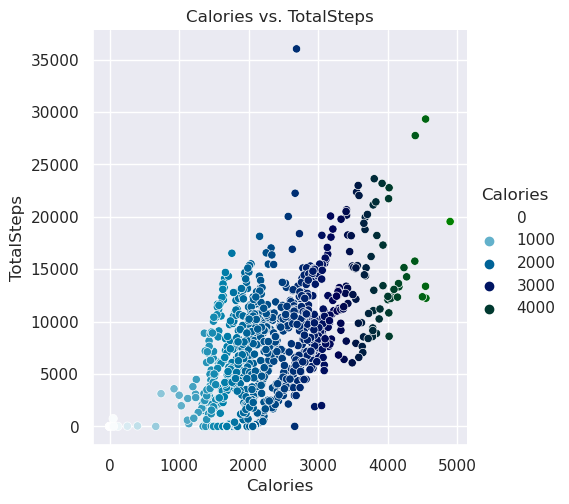

In [31]:
def calories_corr(col):
    sns.set_style('darkgrid')
    sns.relplot(data=dailyActivity, x='Calories', y=col, palette='ocean_r', hue='Calories')
    plt.title(f'Calories vs. {col}')
    plt.show()

    
calories_corr('TotalSteps')

- Total steps is positively correlated with calories burned. The higher the number of steps you take, the more calories burned. 

##### Correlation of Calories to Total Distance

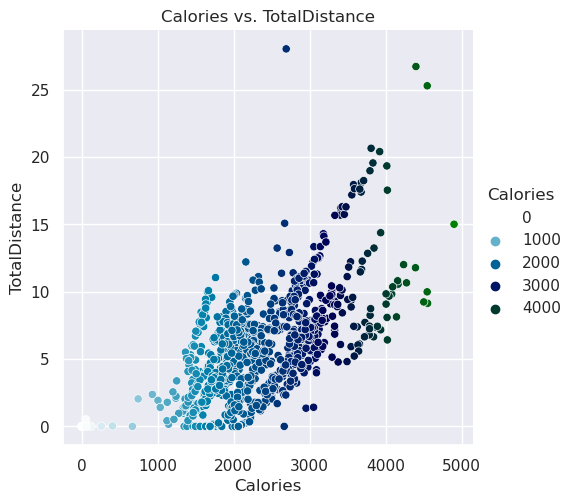

In [32]:
calories_corr('TotalDistance')

- Total distance is positively correlated with calories burned. The longer the distance of your walk/run, the more calories burned. 

##### Correlation of Calories to Total Distance

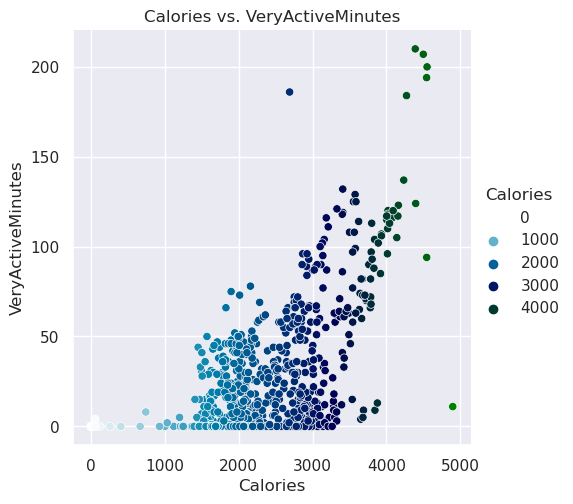

In [33]:
calories_corr('VeryActiveMinutes')

- Very active minutes has a positive correlation with calories burned, as we can see from this graph.

##### Correlation of Calories to METs

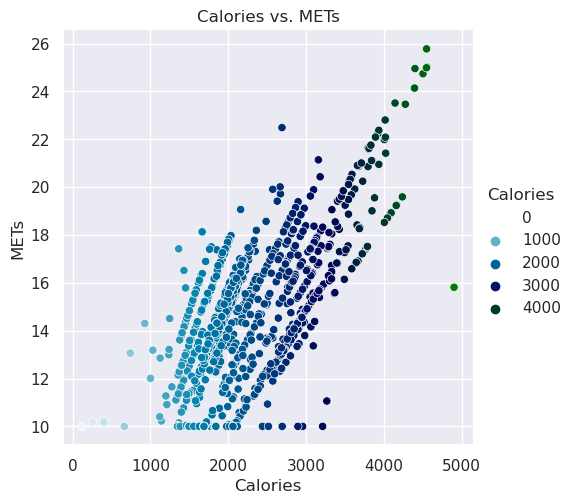

In [34]:
calories_corr('METs')

- The correlation of calories burned to METs also has an upward trajectory.

##### Average Calories per day

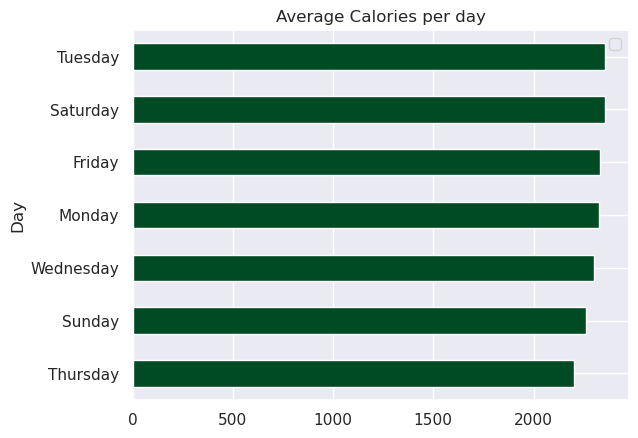

In [35]:
def per_day_graph(col):
    per_day_subset = per_day[[col]].sort_values(by=col, ascending=True)
    per_day_subset.plot(kind='barh')
    plt.title(f'Average {col} per day')
    plt.legend('')
    plt.show()
    
    
per_day_graph('Calories')

- On average, Tuesday is the day users burn calories the most.

##### Average Steps per day

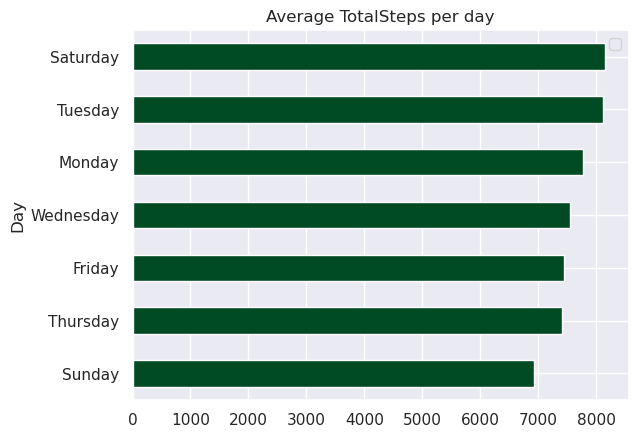

In [36]:
per_day_graph('TotalSteps')

- Saturday has the highest average total steps.

##### Average Distance per day

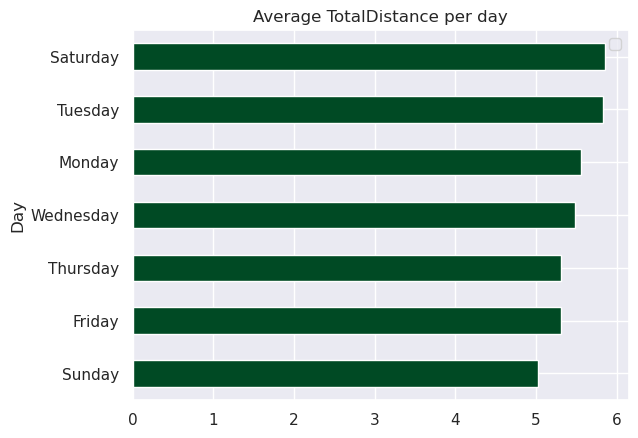

In [37]:
per_day_graph('TotalDistance')

- In conjuction with Total Steps, Saturday is the day users record the longest distance on average.

##### Average METs per day

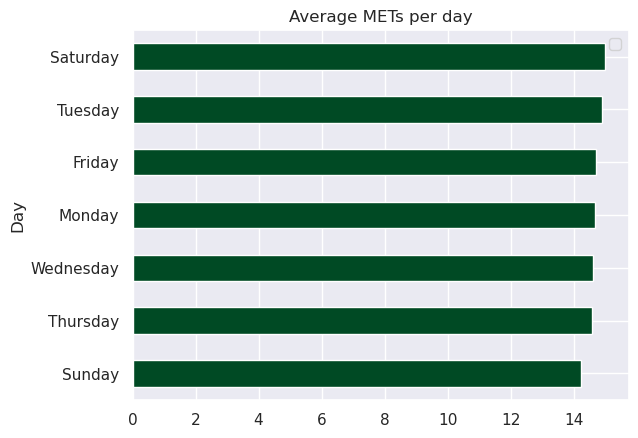

In [38]:
per_day_graph('METs')

- Saturday is also the day users have the highest number of average METs.

##### Average Very Active Minutes per day

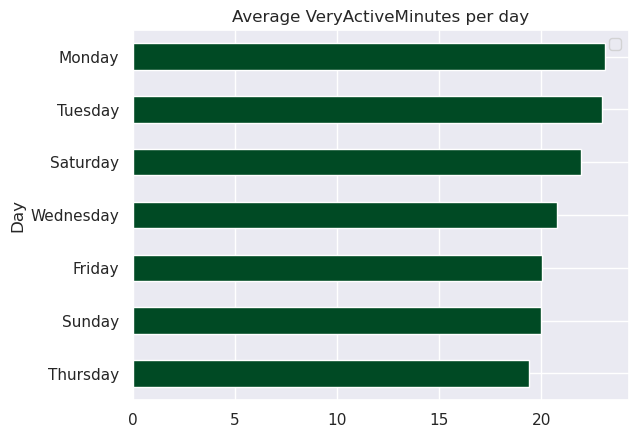

In [39]:
per_day_graph('VeryActiveMinutes')

- This time, Monday is the day users record their most rigorous form of exercise.
- We can conclude that on average, Monday, Tuesday and Saturday are the days users are mostly active.

##### Average Calories per hour

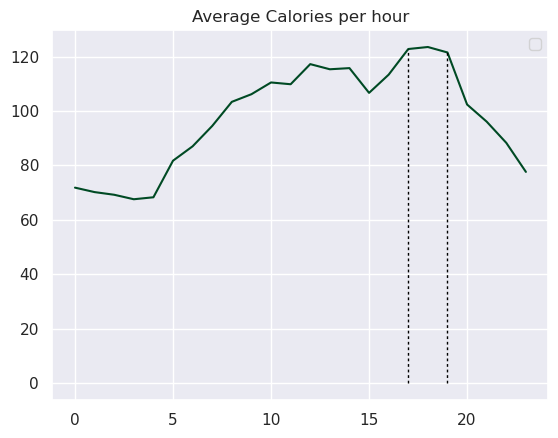

In [40]:
def hourly_graph(df, col):
    hourly_subset = df[[col]]
    five_pm = hourly_subset.loc[17][0]
    seven_pm = hourly_subset.loc[19][0]
    plt.plot(hourly_subset)
    plt.plot([17, 17, 17], [0, five_pm, five_pm], 'k-', lw=1, dashes=[2, 2])
    plt.plot([19, 19, 19], [0, seven_pm, seven_pm], 'k-', lw=1, dashes=[2, 2])
    plt.title(f'Average {col} per hour')
    plt.legend('')
    plt.show()
    
    
hourly_graph(hourly_lifestyle, 'Calories')

- Most of the calories were burned between 5-7 PM, the usual after-work hours.

##### Average Steps per hour

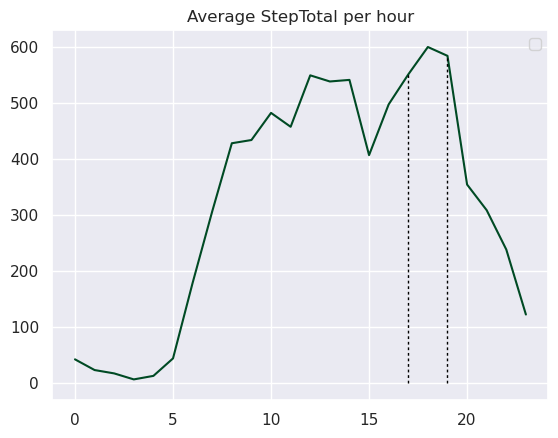

In [41]:
hourly_graph(hourly_lifestyle, 'StepTotal')

- Most of the steps taken also happen between 5-7 PM.

##### Average Steps per hour

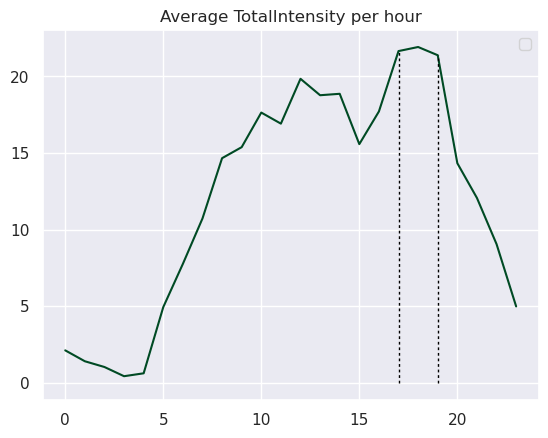

In [42]:
hourly_graph(hourly_lifestyle, 'TotalIntensity')

- The highest intensity of exercise happens between 5-7 PM, in line with calories and steps count.

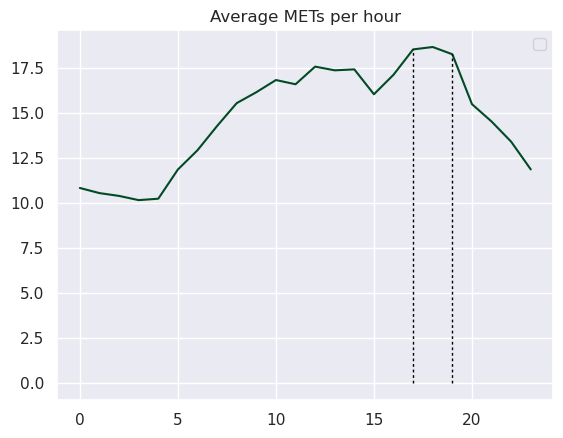

In [43]:
hourly_graph(hourlyMETs, 'METs')

- The highest average METs per hour were also recorded between 5-7 PM.
- We can conclude that most of the activity happen between 5-7 PM - after-work hours.

### ACT


The recommendations for this case study will focus on three things - rewards system, notification system, and social media integration. These will in turn help users maintain a healthy lifestyle and inform Bellabeat's marketing strategy.

1. **Rewards System**

The best way to motivate users of the product is to reward them when they make progress and hit their fitness goals. We can use the trends and insights gained in this study to implement this system.

Here is an example:
- 10,000 steps is the recommended number of steps per day to maintain a healthy lifestyle. When the user achieved 10,000 in a day, he will earn an XP.
- It is also recommended for the users to have at least 30 minutes of moderate to intense exercises. An XP will also be provided for this.
- Only a handful of the participants of this study tracked their weight and heart rate data. Users will also earn XP when they consistently update their data of weight, heart rate, sleep, and so on.
- All earned XPs will enable the users to select from Bellabeat's rewards catalogue, which may include items, vouchers, and discounts on Bellabeat's other products.

2. **Notification System**

The notification system can play an integral part of keeping Bellabeat customers healthy. Bellabeat can provide users access to the following notifications:
- **Milestones/achievements.** As mentioned on the first recommendation, the best way to keep users motivated is to make them feel rewarded. Bellabeat must notify users when they hit their fitness goals in order for them to continue the things they are doing well.
- **Time to exercise.** Part of the key insights of this case study is that users are mostly active between 5 to 7 PM, the usual after work hours. Also, most of the activity happen on Tuesday and Saturday. Users have the option to enable notifications of what time and/or day to be notified to exercise.
- **Tips.** The Bellabeat app have the ability to educate users by showing them the benefits of exercise which can then further motivate them to exercise. For example, Bellabeat can load up a notification indicating that walking 10,000 steps a day can help reduce the risk of these common health problems - heart disease, obesity, diabetes, high blood pressure, and depression.

3. **Social Media Integration**

Here are the two key benefits of Bellabeat integrating social media apps into their product:
1. **Motivated users** - People love sharing their achievements in life in social media. Bellabeat can provide a way to enable users to share their fitness milestones on social media. By being able to share their achievements, users can get praises and feedbacks from family, friends, and colleagues, thus making them much motivated to exercise.
2. **Greater product reach** - When users share their milestones, the product itself also gain presence especially to those who are not yet aware of the product. This will help Bellabeat become much more known to people, and potentially capture future users and greater sales.